<a href="https://colab.research.google.com/github/RAHULRAJ666DX/50_StartUps_Linear_Regression_Project/blob/main/50_Startups_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [78]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math

#sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [79]:
# from google.colab import drive
# drive.mount('/content/drive')

In [80]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/RAHULRAJ666DX/50_StartUps_Linear_Regression_Project/main/50_Startups.csv')

dataset1 = dataset.copy()

In [81]:
# Checking the length of Dataset
len(dataset)

50

In [82]:
# Checking the Dataset
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [83]:
# Shape of Dataset
dataset.shape

(50, 5)

**Pair Plot is the best plot to check all the Correlation in the dataset at once**

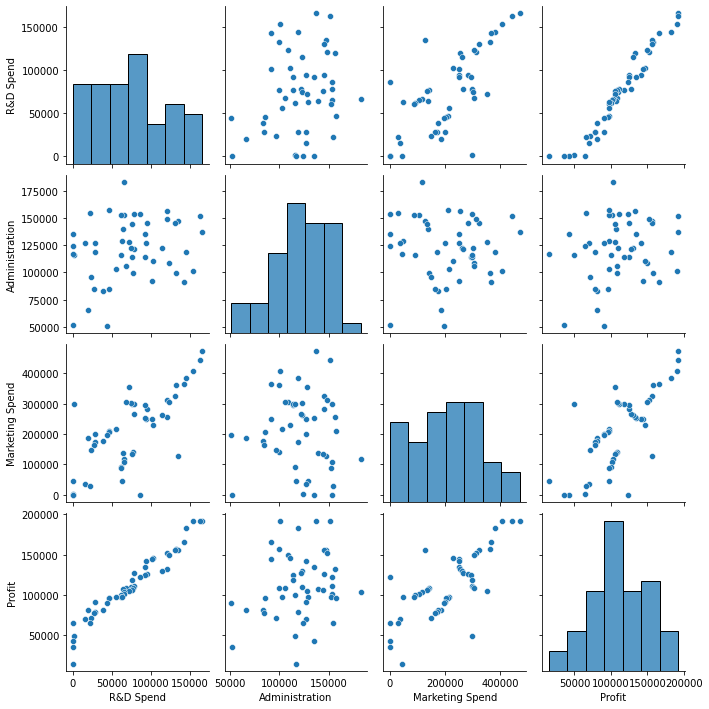

In [84]:
import seaborn as sns
sns.pairplot(dataset)

In [85]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

### **Creating a Loop for Scatter plots to check the relation between the Independent and the dependent variables**

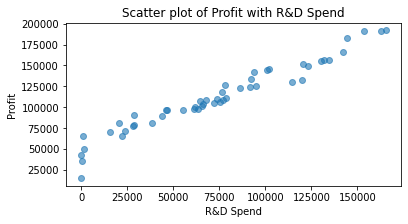

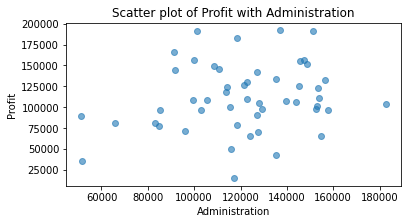

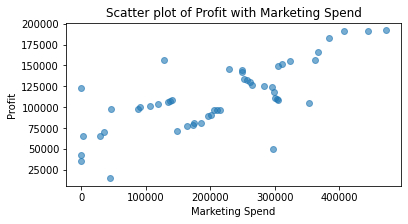

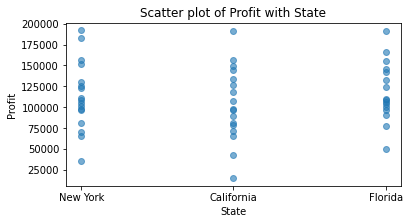

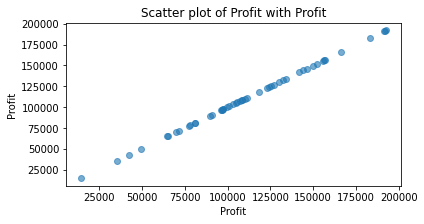

In [86]:
for col in dataset.columns:
  plt.figure(figsize=(6, 3))
  plt.scatter(dataset[col],dataset['Profit'],alpha=0.6)
  plt.title(f"Scatter plot of Profit with {col}")
  plt.xlabel(f"{col}")
  plt.ylabel('Profit')
  plt.show()


### **Creating a Loop to plot REGPLOT (scatter,regression line) to check the relation between variables and a possible regression line estimation**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


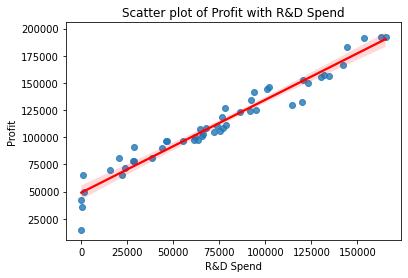

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


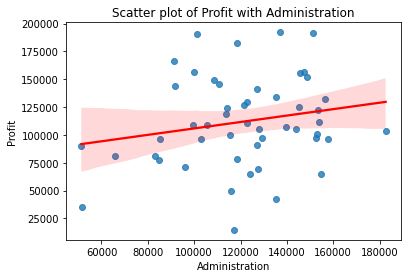

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


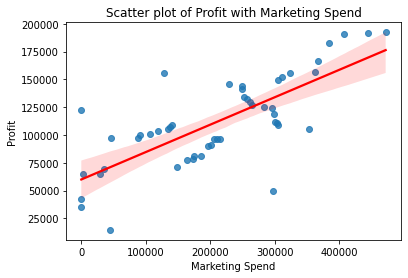

In [87]:
for col in dataset.columns[:3]:

  sns.regplot(dataset[col].astype(float),dataset['Profit'],line_kws={'color':'red'})
  plt.title(f"Scatter plot of Profit with {col}")
  plt.xlabel(f"{col}")
  plt.ylabel('Profit')
  plt.show() 

From the Regplot we can say that Marketing Spend, Administration, R&D spend has positive correlation with Profit

### **Checking the Correlation and Plotting the Heatmap for the dataset**

In [88]:
dataset1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


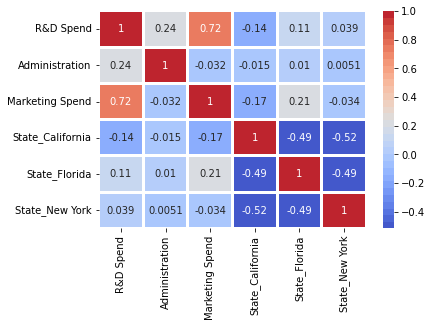

In [129]:
sns.heatmap(dataset1.corr(), cmap=sns.color_palette("coolwarm", 32),annot=True, linewidths=2, linecolor='white')

### **Checking the "State" column unique values**


In [90]:
# Checking the "State" column unique values
dataset1.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

**As we can see we have 3 different states name in the column and we will try to Groupby interms of Profit**

In [91]:
dataset.State.value_counts().reset_index()

,index,State
0,New York,17
1,California,17
2,Florida,16


Text(0, 0.5, 'Profit')

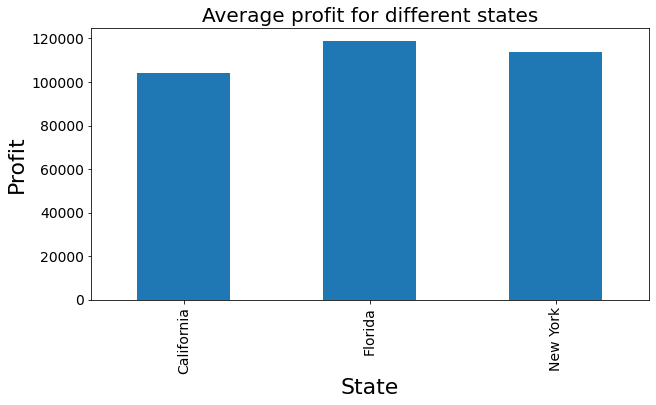

In [92]:
# Create the figure object 
ax = dataset1.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14 
)

# Set the title
ax.set_title("Average profit for different states", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 22)
ax.set_ylabel("Profit", fontsize = 22)

### **Creating a Dummy Variable for State Column to convert it into a numerical column**

In [93]:
dataset1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [94]:
# Create dummy variables for the catgeorical variable State
# dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
# dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
# dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

In [95]:
dataset1 = pd.get_dummies(dataset1)
dataset1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


Since we now have all the columns with Numerical Data we can now Divide them into Independent and Dependent dataframes

In [96]:
dataset1.drop(columns=['Profit'], inplace=True)


In [97]:
Independent = dataset1
Independent.head(2)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.2,136897.80,471784.10,0,0,1
1,162597.7,151377.59,443898.53,1,0,0


In [98]:
Dependent = dataset['Profit']
Dependent.head(3).reset_index()

,index,Profit
0,0,192261.83
1,1,191792.06
2,2,191050.39


In [99]:
Independent.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_California',
       'State_Florida', 'State_New York'],
      dtype='object')

### **Creating "DISPLOT' to check the distribution of Data points**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


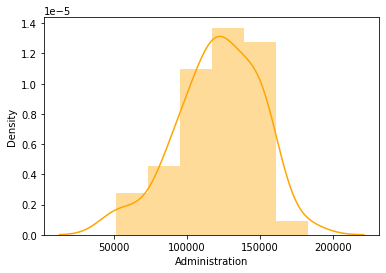

In [184]:
sns.distplot((dataset['Administration']),color="orange")


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


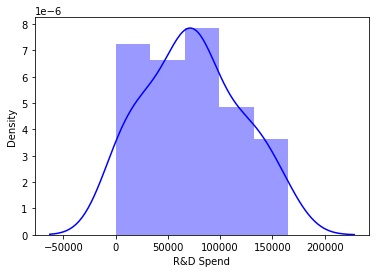

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


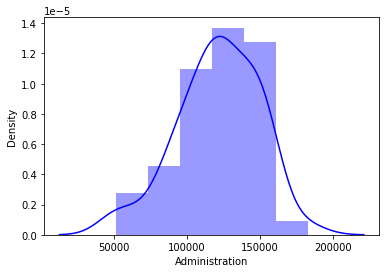

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


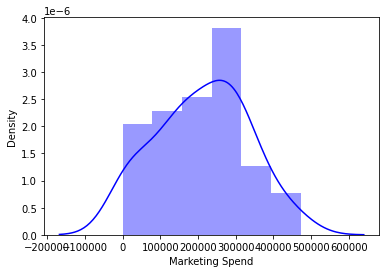

In [183]:
for col in Independent.columns[:3]:
  sns.distplot((dataset[col]),color="b")
  # sns.distplot(np.log(dataset['price']),color="blue")
  plt.show()

### **Most of the data is not extremely skewed so we do not have to use log transformation**

## **TRAIN and TEST Splitting**

In [100]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size = 0.2, random_state = 0)

In [186]:
X_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 1.        ,
        0.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 0.        , 0.        ,
        1.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 1.        ,
        0.        ],
       [0.2807759 , 1.        , 0.44680961, 1.        , 0.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 1.        ,
        0.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 1.        ,
        0.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 1.        ,
        0.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 0.        , 0.        ,
        1.        ],
       [0.00327821, 0.00432296, 0.        , 0.        , 0.        ,
        1.        ],
       [0.39676926, 0.95618996, 0.22709197, 0.        , 0.        ,
        1.        ]])

## **Scaling The Data using MinMaxScalar** 

In [102]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
X_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 1.        ,
        0.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 0.        , 0.        ,
        1.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 1.        ,
        0.        ],
       [0.2807759 , 1.        , 0.44680961, 1.        , 0.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 1.        ,
        0.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 1.        ,
        0.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 1.        ,
        0.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 0.        , 0.        ,
        1.        ],
       [0.00327821, 0.00432296, 0.        , 0.        , 0.        ,
        1.        ],
       [0.39676926, 0.95618996, 0.22709197, 0.        , 0.        ,
        1.        ]])

We can see the entire data is not in between 0 and 1

## **Regression Line Fitting**

In [104]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [187]:
# Linear Regression Intercept
regressor.intercept_

44153.95466784855

In [106]:
regressor.coef_

array([ 1.27892182e+05,  3.49927567e+03,  1.72720281e+04,  8.66383692e+01,
       -8.72645791e+02,  7.86007422e+02])

In [107]:
Independent.head(2)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.2,136897.80,471784.10,0,0,1
1,162597.7,151377.59,443898.53,1,0,0


In [108]:
Independent.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_California',
       'State_Florida', 'State_New York'],
      dtype='object')

**Predicting the Test set results**


In [193]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)
y_pred_test

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

**Predicting the Train data**

In [194]:
# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

## **Comparing the Predicted and Actual Data**

In [111]:
# Actual Train Data
print(y_train)

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64


In [112]:
#Predicted profit on the train data
y_pred_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [113]:
# Actual profits on test data
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [114]:
# Predicted Test Data
y_pred_test = regressor.predict(X_test)
y_pred_test

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

## **Finding out Errors and Performance**

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [218]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [219]:
r2_score(y_test,y_pred_test)

0.9347068473282426

In [220]:
regressor.score(X_test,y_test)

0.9347068473282426

### **Training performance is 95.018% and Test is 93.47%**

### **Plot to compare Actual and Predicted values in Linear Regression**

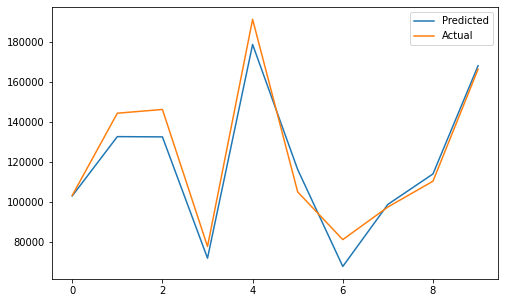

In [312]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

### **Checking the Mean Squared Error**

In [223]:
# mean_squared_error(y_train, y_pred_train)
mean_squared_error(y_test, y_pred_test)

83502864.03257725

In [224]:
# MAE
mean_absolute_error(y_test, y_pred_test)

7514.2936596406

**Mean squared error for the model = 83502864.03**

**Mean absolute error for the model = 7514.29**

### **Root Mean Square Value**


In [120]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [121]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred_test))

9137.990152794937

**RMSE_test = 9137.99** 

In [122]:
# R square
r2_score(y_train, y_pred_train)

0.9501847627493607

In [226]:
r2_score(y_test, y_pred_test)


0.9347068473282426

**R2 score for Train Data = 0.9501**

**R2 score for Test Data = 0.9347**

## **Adjusted r2**

In [227]:
X_test.shape,y_test.shape

((10, 6), (10,))

In [288]:
r2 = r2_score(y_test, y_pred_test)
r2

0.9347068473282426

In [283]:
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
radj = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {radj:.4f}')

Adjusted R-squared: 0.8041


### **Mean Squared Error**

## **Linear Regression**
Mean squared error = **83502864.03**

Mean absolute error = **7514.29**

Root Mean squared error = **9137.99** 

R2 score for Train Data = **0.9501**

R2 score for Test Data = **0.9347**

Adjusted R-square = **0.8041**

# **RIDGE Regression**

In [234]:
from sklearn.linear_model import Ridge 

In [238]:
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [289]:
R_y_test = ridge.predict(X_test)
R_y_train = ridge.predict(X_train)

### **Plot to compare Actual and Predicted values in Ridge Regression**

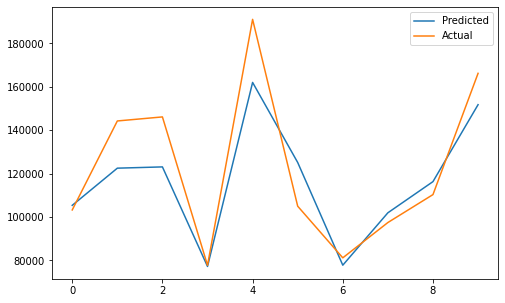

In [309]:
plt.figure(figsize=(8,5))
plt.plot(R_y_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [299]:
mean_squared_error(y_test, R_y_test)

253197124.19952044

In [300]:
# MAE
mean_absolute_error(y_test, R_y_test)

12487.510643379404

In [301]:
# Test performance
math.sqrt(mean_squared_error(y_test, R_y_test))

15912.169060172797

**R2 score for Test data**

In [290]:
r2_ridge = r2_score(y_test, R_y_test)
r2_ridge

0.8020183058636227

In [291]:
# ridge.score(X_test, y_test)

0.8020183058636227

**R2 score for Train data**

In [294]:
r2_score(y_train, R_y_train)

0.9070974955252402

In [258]:
# ridge.score(X_train, y_train)

0.9070974955252402

**Ridge Regression**

Ridge: R2 score for Train Data = **0.907**

Ridge: R2 score for Test Data = **0.802**

In [295]:
r2_ridge = r2_score(y_test, R_y_test)
r2_ridge

0.8020183058636227

In [296]:
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
radj_ridge = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {radj_ridge:.4f}')

Adjusted R-squared: 0.8041


**Ridge Regression**

Mean squared error = **253197124.199**

Mean absolute error = **12487.51**

Root Mean squared error = **15912.169** 

Ridge: R2 score for Train Data = **0.907**

Ridge: R2 score for Test Data = **0.802**

Adjusted R-squarede for the data = **0.8041**

# **Lasso**

In [262]:
from sklearn.linear_model import Lasso 

In [263]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [272]:
lasso_y_test = lasso.predict(X_test)
lasso_y_train = lasso.predict(X_train)

In [302]:
# Mean Squared Error
mean_squared_error(y_test,lasso_y_test)

83385123.79965124

In [303]:
# Root Mean Squared Error
math.sqrt(mean_squared_error(y_test,lasso_y_test))

9131.545531817232

In [304]:
# Mean Absolute Error
mean_absolute_error(y_test,lasso_y_test)

7509.684931877372

### **Plot to compare Actual and Predicted values in Lasso Regression**

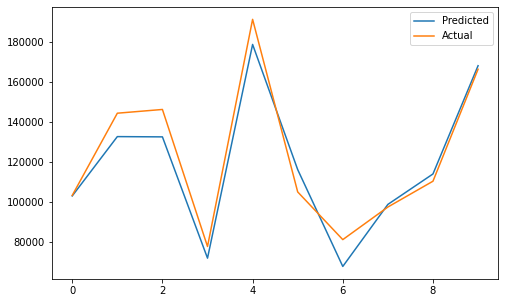

In [308]:
plt.figure(figsize=(8,5))
plt.plot(lasso_y_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [273]:
r2_score(y_train, lasso_y_train)

0.9501847315426798

In [297]:
r2_lasso = r2_score(y_test, lasso_y_test)
r2_lasso

0.9347989116076312

In [298]:
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
radj_lasso = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {radj_lasso:.4f}')

Adjusted R-squared: 0.8041


**Lasso Regression**

Mean squared error = **83385123.79**

Mean absolute error = **7509.684**

Root Mean squared error = **9131.545** 

Lasso: R2 score for Train Data = **0.9501**

Lasso: R2 score for Test Data = **0.9347**

Adjusted R-squarede for the data = **0.8041**

### **Exporting the Machine Learning Model**

In [126]:
import pickle

In [127]:
pickle.dump(regressor,open('MODEL.pkl','wb'))